# CS 109A/STAT 121A/AC 209A 

## Lab 2: Cleaning and EDA of Goodreads 

**Harvard University**<br>
**Fall 2017**<br>
**Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine**

---

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Goals

About 6000 odd "best books" were fetched and parsed from [Goodreads](https://www.goodreads.com). The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file. In this lab we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  


By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set

*This lab corresponds to lectures 2 and 3 and maps on to homework 1 and further.*

### Basic EDA workflow

(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Report all the issues you found with the data and how you resolved them.  

[15 minutes]

----

## _Part 1 - SOLUTION_ 




After loading appropriate libraries


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Cleaning. Issue 1: Missing Header 
We read in and clean the data from `goodreads.csv`.  Before running the second cell below, if you open the CSV file in Excel or your favorite text editor, you will find that there is no header. So lets add that in from the column descriptions above.

(Since there's no header, the `read_csv` command has included assignment of names labels to each column. )

In [2]:
df=pd.read_csv("data/goodreads.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'],
)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


### Cleaning. Issue 2: Wrong Datatypes 

We should examine the dataframe to make sure the data is loaded as we'd expect, starting look with the column data types.

In [3]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Before we address our suspicions, we  note  the dataframe dimensions and the column names.

In [4]:
print(df.shape)
df.columns

(6000, 10)


Index(['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'], dtype='object')

Notice that `review_count` and `rating_counts` are objects instead of ints, and the `year` is a float!

### Cleaning. Issue 3: Examining `NaN` values

Perhaps our parsing didn't work in some places, so that we have missing values?  Let's see for a column which seemed OK to us.

In [5]:
df[df.rating.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None


Ooh, just having the `dtypes` correct is not always enough to make sure our data are good!

The missing ratings show up as `NaN`.  You might wonder why `rating`  isn't type `object`. The reason is the `NaN` which stands for *Not-A-Number* and is encoded by pandas as `float`.

Since there are only two occurences of `NaN` in `rating`, we could go back to the individual files and craft an alternate way to get the ratings since these pages are different. Or we could just drop these books entirely from any future analysis.

Thankfully, many pandas functions take `NaN`s into account.  For example, read the [documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.mean.html#pandas.DataFrame.mean) for `mean`.  The `NaN` values are excluded from the calculation. 

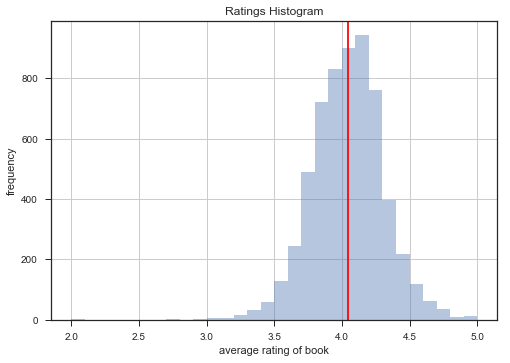

In [6]:
sns.set_context("notebook")
meanrat=df.rating.mean()
#with allows us to temporarily set plotting parameters
with sns.axes_style("ticks"):
    df.rating.hist(bins=30, alpha=0.4);
    plt.axvline(meanrat, 0, 1, color='r', label='Mean')
    plt.xlabel("average rating of book")
    plt.ylabel("frequency")
    plt.title("Ratings Histogram")

We'll now check if any of the other suspicious columns have missing values.  Let's look at `year` and `review_count` first.

One thing you can do is to try and convert to the type you expect the column to be. If something goes wrong, it likely means your data are bad.

In [7]:
df.year.astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

Lets test for missing data:

In [8]:
df[df.year.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


#### Cleaning. Issue 3.1: Dropping Examining `NaN` values

In [9]:
df = df[df.year.notnull()]

Ok so we have done some cleaning. What do things look like now? Notice the float has not yet changed.

In [10]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [11]:
print(np.sum(df.year.isnull()))
print(np.sum(df.rating_count.isnull())) # no more NaN rating counts
print(np.sum(df.review_count.isnull())) # no more NaN review counts
# We removed seven rows
df.shape

0
0
0


(5993, 10)

*Suspect observations for rating and rating_count were removed as well! *

Ok so lets fix those types. If the type conversion fails, we now know we have further problems

In [12]:
df.rating_count=df.rating_count.astype(int)
df.review_count=df.review_count.astype(int)
df.year=df.year.astype(int)

We seem to be good on these columns (no errors in conversion). Lets look:

In [13]:
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

Sweet!

#### Cleaning. Issue 3.2: Empty string  `NaN` values
Now all the types *could* be reasonable.  But let's look at some of the columns more carefully, starting with genre.

In [14]:
df[df.genre_urls.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
953,4.56,27,1477276068,good_reads:book,https://www.goodreads.com/author/show/6621980....,2012,NaN,dir10/16243767-crossing-the-seas.html,90,Crossing the Seas
1515,4.56,8,NaN,good_reads:book,https://www.goodreads.com/author/show/394525.T...,2013,NaN,dir16/18136407-crashing-down-to-earth.html,75,Crashing Down to Earth
1693,4.21,7,NaN,good_reads:book,https://www.goodreads.com/author/show/3110785._,2009,NaN,dir17/7425765.html,67,Ð¡Ð»ÑÐ½ÑÐµ Ð½ÐµÐ´Ð¾ÑÐµÐ³Ð°ÐµÐ¼Ð¾
1752,3.85,41,140921818X,good_reads:book,https://www.goodreads.com/author/show/7337562....,13,NaN,dir18/5548850-the-day-jesus-rode-into-croydon....,94,The Day Jesus Rode Into Croydon
1942,4.66,8,0992382009,good_reads:book,https://www.goodreads.com/author/show/7574275....,2014,NaN,dir20/19532388-letters-from-your-soul.html,29,Letters from your soul
2034,4.92,2,147930414X,good_reads:book,https://www.goodreads.com/author/show/6467808....,2012,NaN,dir21/20363899-happy-halloween.html,49,Happy Halloween
2067,4.16,24,0804844399,good_reads:book,https://www.goodreads.com/author/show/6894841....,2012,NaN,dir21/18343754-a-capitalist-in-north-korea.html,57,A Capitalist in North Korea
2145,5.00,3,1300589469,good_reads:book,https://www.goodreads.com/author/show/6906561....,2012,NaN,dir22/17287259-a-book-about-absolutely-nothing...,63,A Book About Absolutely Nothing.
2170,4.65,12,NaN,good_reads:book,https://www.goodreads.com/author/show/6565853....,2012,NaN,dir22/17904495-curse-of-the-salute.html,31,Curse of The Salute
2190,4.33,31,0987434853,good_reads:book,https://www.goodreads.com/author/show/4443219....,2013,NaN,dir22/18251020-life-song.html,40,Life Song


How should we deal with the observations with `NaN` genres?  Should we remove them?  If so, why?  If not, why not?



We don't want to get rid of these observations, but we'd like the data to be sensible: an empty string. While we are at it, there are also `NaN` ISBN entries, so let's set those to empty strings as well. 

In [15]:
df[df.isbn.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
16,3.92,38061,NaN,good_reads:book,https://www.goodreads.com/author/show/498072.A...,2003,/genres/fiction|/genres/romance|/genres/fantas...,dir01/18619684-the-time-traveler-s-wife.html,927254,The Time Traveler's Wife
49,3.85,11628,NaN,good_reads:book,https://www.goodreads.com/author/show/5152.Vla...,1955,/genres/classics|/genres/fiction|/genres/liter...,dir01/7604.Lolita.html,374886,Lolita
85,4.16,14968,NaN,good_reads:book,https://www.goodreads.com/author/show/137902.R...,2007,/genres/young-adult|/genres/teen|/genres/young...,dir01/18660669-vampire-academy.html,297022,"Vampire Academy (Vampire Academy, #1)"
116,3.92,8393,NaN,good_reads:book,https://www.goodreads.com/author/show/957894.A...,1942,/genres/classics|/genres/fiction|/genres/philo...,dir02/49552.The_Stranger.html,307566,The Stranger
156,4.03,3473,NaN,good_reads:book,https://www.goodreads.com/author/show/4785.Ale...,1843,/genres/classics|/genres/fiction|/genres/histo...,dir02/7190.The_Three_Musketeers.html,156968,The Three Musketeers
195,4.06,8630,NaN,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2008,/genres/young-adult|/genres/paranormal|/genres...,dir02/4502877-midnight-sun.html,124018,"Midnight Sun (Twilight, #1.5)"
299,4.20,19915,NaN,good_reads:book,https://www.goodreads.com/author/show/4464118....,2011,/genres/romance|/genres/new-adult|/genres/youn...,dir03/11505797-beautiful-disaster.html,271613,"Beautiful Disaster (Beautiful, #1)"
301,4.37,2058,NaN,good_reads:book,https://www.goodreads.com/author/show/5158478....,632,/genres/religion|/genres/classics|/genres/spir...,dir04/646462.The_Quran.html,29243,The Quran
308,3.73,3801,NaN,good_reads:book,https://www.goodreads.com/author/show/3535.Wil...,1930,/genres/classics|/genres/fiction|/genres/liter...,dir04/77013.As_I_Lay_Dying.html,76262,As I Lay Dying
444,3.79,2291,NaN,good_reads:book,https://www.goodreads.com/author/show/1433597....,1952,/genres/plays|/genres/classics|/genres/academi...,dir05/17716.Waiting_for_Godot.html,75494,Waiting for Godot


In [16]:
df.loc[df.genre_urls.isnull(), 'genre_urls']=""
df.loc[df.isbn.isnull(), 'isbn']=""

In [17]:
np.sum(df.genre_urls.isnull())

0

In [18]:
np.sum(df.isbn.isnull())

0

Finally look at the remaining columns.

In [19]:
np.sum(df.booktype.isnull()), np.sum(df.author_url.isnull()), np.sum(df.dir.isnull()), np.sum(df.name.isnull())

(0, 0, 0, 0)

---

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

[5 min]

## _Part 2 SOLUTION_ 
---

* Which are the best books?
* Is finction more popular than fantasy? 
* Is J K Rowling the highest rated author?
* What are the trends in popularity of genres
* Which genre is more popular now vs 100 years ago?

---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  

[10 minutes]

---

## _Part 3:  SOLUTION_ 


In [20]:
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


In [22]:
df.shape

(5993, 10)

In [23]:
test_string = df.author_url[0]
test_string

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [24]:
".".join(test_string.split('/')[-1].split('.')[1:])

'Suzanne_Collins'

In [25]:
df['author']=df.author_url.map(lambda x: ".".join(x.split('/')[-1].split('.')[1:]))

We've added the column `author` so that the dataframe has an additional column. 

In [26]:
df.author[0:5]

0    Suzanne_Collins
1        J_K_Rowling
2    Stephenie_Meyer
3         Harper_Lee
4        Jane_Austen
Name: author, dtype: object

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.
This is a little more complicated because there be more than one genre. 

In [27]:
df.genre_urls.head()

0    /genres/young-adult|/genres/science-fiction|/g...
1    /genres/fantasy|/genres/young-adult|/genres/fi...
2    /genres/young-adult|/genres/fantasy|/genres/ro...
3    /genres/classics|/genres/fiction|/genres/histo...
4    /genres/classics|/genres/fiction|/genres/roman...
Name: genre_urls, dtype: object

In [28]:
def split_and_join_genres(item):
    genres=item.strip().split('|')
    genres=[e.split('/')[-1] for e in genres]
    return "|".join(genres)

In [29]:
split_and_join_genres("/genres/young-adult|/genres/science-fiction")

'young-adult|science-fiction'

In [30]:
split_and_join_genres("")

''

In [31]:
df['genres']=df.genre_urls.map(split_and_join_genres)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,classics|fiction|romance|historical-fiction|li...


In [32]:
df.shape

(5993, 12)

Finally, let's pick an author at random so we can see the results of the transformations.  Scroll to see the `author` and `genre` columns that we added to the dataframe.

In [33]:
df[df.author == "Marguerite_Yourcenar"]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
1014,4.23,483,0374529264,good_reads:book,https://www.goodreads.com/author/show/7732.Mar...,1951,/genres/historical-fiction|/genres/fiction|/ge...,dir11/12172.Memoirs_of_Hadrian.html,6258,Memoirs of Hadrian,Marguerite_Yourcenar,historical-fiction|fiction|cultural|france|cla...
5620,4.11,74,2070367983,good_reads:book,https://www.goodreads.com/author/show/7732.Mar...,1968,/genres/fiction|/genres/historical-fiction|/ge...,dir57/953435.L_uvre_au_noir.html,1601,L'Åuvre au noir,Marguerite_Yourcenar,fiction|historical-fiction|cultural|france|eur...


---

## Part 4: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. Do you find anything interesting or strange? 


[10 minutes]

---

##  _Part 4: Solution_


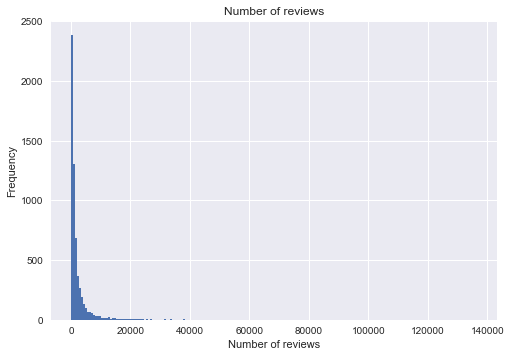

In [34]:
df.review_count.hist(bins=200)
plt.xlabel('Number of reviews')
plt.ylabel('Frequency')
plt.title('Number of reviews');

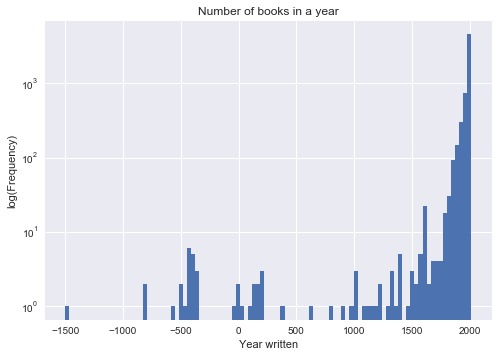

In [35]:
plt.hist(df.year, log=True, bins=100);
plt.xlabel('Year written')
plt.ylabel('log(Frequency)')
plt.title('Number of books in a year')

It appears that some books were written in negative years!  Print out the observations that correspond to negative years.  What do you notice about these books?  

In [36]:
#your code here
df[df.year < 0].name
#These are books written before the Common Era (BCE, equivalent to BC).

47                               The Odyssey
246                    The Iliad/The Odyssey
455                             The Republic
596                               The Aeneid
629                              Oedipus Rex
674                           The Art of War
746                        The Bhagavad Gita
777                                 Antigone
1233                       The Oedipus Cycle
1397                          Aesop's Fables
1398                   The Epic of Gilgamesh
1428                                   Medea
1815                            The Oresteia
1882         The Trial and Death of Socrates
2078    The History of the Peloponnesian War
2527                           The Histories
3133                          Complete Works
3274                  The Nicomachean Ethics
3757                              Lysistrata
4402                           The Symposium
4475                                 Apology
5367                          Five Dialogues
Name: name

Let's plot the rating against year, and limit the year range to some notion of a modern era.

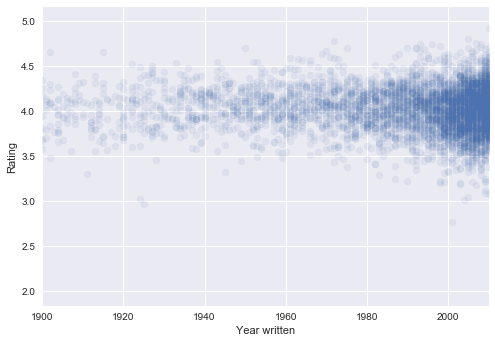

In [37]:
plt.scatter(df.year, df.rating, alpha=.08) #alpha adjusts the dot transparency
plt.xlim([1900, 2010])
plt.xlabel("Year written")
plt.ylabel("Rating");

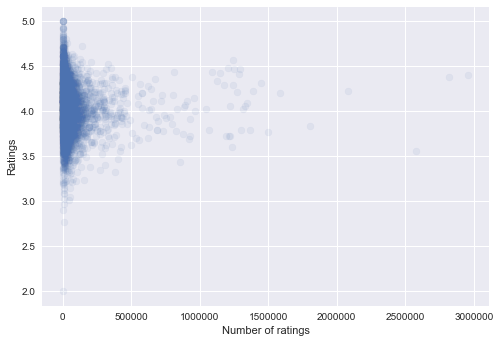

In [38]:
plt.scatter(df.rating_count, df.rating, alpha=.08)
plt.xlabel("Number of ratings")
plt.ylabel("Ratings")